In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine


# Wine Dataset

In [11]:
samples, labels = load_wine(return_X_y=True)
samples = samples.T # use the same features, samples structure as usual


# Standardization of Data

In [14]:
sample_mean = np.mean(samples, axis=1)
sample_mean = np.reshape(sample_mean, (len(sample_mean), 1))
samples_centered = samples - sample_mean


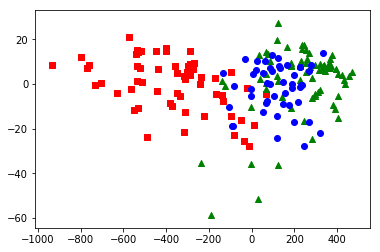

In [18]:
U, Sigma, V = np.linalg.svd(samples_centered)
U2 = U[:, :2]
samples_pca = U2.T @ samples_centered

plt.figure()
for sample, label in zip(samples_pca.T, labels):
#     print(sample)
    color = 'r'
    marker = 's'
    if label == 1:
        color = 'g'
        marker = '^'
    elif label == 2:
        color = 'b'
        marker = 'o'
    plt.scatter(*sample, c=color, marker=marker)
plt.show()
    

In [36]:
sample_variance = np.var(samples_centered, axis=1)
sample_variance = np.reshape(sample_variance, (len(sample_variance), 1))
# print(sample_variance)
samples_norm = samples_centered / np.sqrt(sample_variance)
# print(np.sqrt(sample_variance))
print(samples_norm.shape)
print(np.var(samples_norm, axis=1))


(13, 178)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


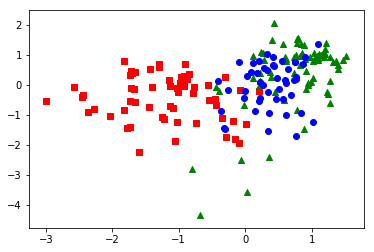

In [29]:
Un, Sigman, Vn = np.linalg.svd(samples_norm)
U2n = U2[:, :2]
samples_norm_pca = U2n.T @ samples_norm

plt.figure()
for sample, label in zip(samples_norm_pca.T, labels):
#     print(sample)
    color = 'r'
    marker = 's'
    if label == 1:
        color = 'g'
        marker = '^'
    elif label == 2:
        color = 'b'
        marker = 'o'
    plt.scatter(*sample, c=color, marker=marker)
plt.show()
